# Sentiment Analysis on Customer Reviews
Project mentor: Zach Wood-Doughty

Simon Liu <sliu125@jh.edu>, Shaunak Shah <sshah98@jh.edu>, Phillip Teng <fteng3@jh.edu>, Stephanie Zhang <szhang90@jh.edu>


In [1]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
!unzip -o sentiment%20labelled%20sentences.zip
!pip install contractions

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84188  100 84188    0     0   181k      0 --:--:-- --:--:-- --:--:--  181k
Archive:  sentiment%20labelled%20sentences.zip
  inflating: sentiment labelled sentences/.DS_Store  
  inflating: __MACOSX/sentiment labelled sentences/._.DS_Store  
  inflating: sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: sentiment labelled sentences/imdb_labelled.txt  
  inflating: __MACOSX/sentiment labelled sentences/._imdb_labelled.txt  
  inflating: sentiment labelled sentences/readme.txt  
  inflating: __MACOSX/sentiment labelled sentences/._readme.txt  
  inflating: sentiment labelled sentences/yelp_labelled.txt  
  inflating: __MACOSX/._sentiment labelled sentences  


In [2]:
import pandas as pd
import numpy as np
import sklearn
import os

In [3]:
# data import
root = os.getcwd()
files = {"amazon": os.path.join(root, "sentiment labelled sentences/amazon_cells_labelled.txt"),
         "imdb": os.path.join(root, "sentiment labelled sentences/imdb_labelled.txt"),
         "yelp": os.path.join(root, "sentiment labelled sentences/yelp_labelled.txt")}

X = {'all':[]}
y = {'all':[]}
for provider in files:
  with open(files[provider]) as f:
    content = f.readlines()
  X[provider] = []
  y[provider] = []
  i = 0
  for line in content:
    line = line.strip()
    if (i < 1):
      print(line)
      i=i+1
    feat = line[:-1].strip()
    label = int(line[-1])
    X[provider].append(feat)
    X['all'].append(feat)
    y[provider].append(label)
    y['all'].append(label)


So there is no way for me to plug it in here in the US unless I go by a converter.	0
A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0
Wow... Loved this place.	1


# Baselines 


In [4]:
# split into test and train
from sklearn.model_selection import train_test_split
import random 
# X_train, X_test, y_train, y_test = train_test_split(X['all'], y['all'], test_size=0.2, random_state=3)
def split(X, y):
  rand_state = 69

  # split into test and train
  # X_train, X_test, y_train, y_test = train_test_split(X['all'], y['all'], test_size=0.2, random_state=rand_state)
  X_train_amaz, X_test_amaz, y_train_amaz, y_test_amaz = train_test_split(X['amazon'], y['amazon'], 
                                                                          test_size=0.2, stratify=y['amazon'], random_state=rand_state)
  X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(X['imdb'], y['imdb'], 
                                                                          test_size=0.2, stratify=y['imdb'], random_state=rand_state)
  X_train_yelp, X_test_yelp, y_train_yelp, y_test_yelp = train_test_split(X['yelp'], y['yelp'], 
                                                                          test_size=0.2, stratify=y['yelp'], random_state=rand_state)

  # split into test and validation
  # X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=rand_state)
  X_valid_amaz, X_test_amaz, y_valid_amaz, y_test_amaz = train_test_split(X_test_amaz, y_test_amaz, test_size=0.5, 
                                                                          stratify=y_test_amaz, random_state=rand_state)
  X_valid_imdb, X_test_imdb, y_valid_imdb, y_test_imdb = train_test_split(X_test_imdb, y_test_imdb, test_size=0.5, 
                                                                          stratify=y_test_imdb,random_state=rand_state)
  X_valid_yelp, X_test_yelp, y_valid_yelp, y_test_yelp = train_test_split(X_test_yelp, y_test_yelp, test_size=0.5, 
                                                                          stratify=y_test_yelp, random_state=rand_state)

  X_train = X_train_amaz + X_train_imdb + X_train_yelp
  X_valid = X_valid_amaz + X_valid_imdb + X_valid_yelp
  X_test = X_test_amaz + X_test_imdb + X_test_yelp
  y_train = y_train_amaz + y_train_imdb + y_train_yelp
  y_valid = y_valid_amaz + y_valid_imdb + y_valid_yelp
  y_test = y_test_amaz + y_test_imdb + y_test_yelp

  train = list(zip(X_train, y_train))
  valid = list(zip(X_valid, y_valid))
  test = list(zip(X_test, y_test))

  random.shuffle(train)
  random.shuffle(valid)
  random.shuffle(test)

  X_train, y_train = zip(*train)
  X_valid, y_valid = zip(*valid)
  X_test, y_test = zip(*test)
  return X_train, y_train, X_valid, y_valid, X_test, y_test, X_train_amaz, y_train_amaz, X_train_imdb, y_train_imdb, X_train_yelp, y_train_yelp

In [5]:
rand_state = 69

# split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X['all'], y['all'], test_size=0.2, random_state=rand_state)
X_train_amaz, X_test_amaz, y_train_amaz, y_test_amaz = train_test_split(X['amazon'], y['amazon'], 
                                                                        test_size=0.2, stratify=y['amazon'], random_state=rand_state)
X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(X['imdb'], y['imdb'], 
                                                                        test_size=0.2, stratify=y['imdb'], random_state=rand_state)
X_train_yelp, X_test_yelp, y_train_yelp, y_test_yelp = train_test_split(X['yelp'], y['yelp'], 
                                                                        test_size=0.2, stratify=y['yelp'], random_state=rand_state)

# split into test and validation
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify = y_test, random_state=rand_state)
X_valid_amaz, X_test_amaz, y_valid_amaz, y_test_amaz = train_test_split(X_test_amaz, y_test_amaz, test_size=0.5, stratify=y_test_amaz, random_state=rand_state)
X_valid_imdb, X_test_imdb, y_valid_imdb, y_test_imdb = train_test_split(X_test_imdb, y_test_imdb, test_size=0.5, stratify=y_test_imdb, random_state=rand_state)
X_valid_yelp, X_test_yelp, y_valid_yelp, y_test_yelp = train_test_split(X_test_yelp, y_test_yelp, test_size=0.5, stratify=y_test_yelp, random_state=rand_state)

#X_train, y_train, X_valid, y_valid, X_test, y_test, X_train_amaz, y_train_amaz, X_train_imdb, y_train_imdb, X_train_yelp, y_train_yelp = split(X, y)

In [6]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer

def bag_of_words(Xtrain, Xvalid, Xtest):
  vectorizer = CountVectorizer(stop_words='english')
  x_train_features = vectorizer.fit_transform(Xtrain)
  x_valid_features = vectorizer.transform(Xvalid)
  x_test_features = vectorizer.transform(Xtest)  
  x_train_features = pd.DataFrame(x_train_features.todense())
  x_valid_features = pd.DataFrame(x_valid_features.todense())
  x_test_features = pd.DataFrame(x_test_features.todense())
  return (x_train_features, x_valid_features, x_test_features)

x_train_features, x_valid_features, x_test_features = bag_of_words(X_train, X_valid, X_test)
x_train_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4233,4234,4235,4236,4237,4238,4239,4240,4241,4242,4243,4244,4245,4246,4247,4248,4249,4250,4251,4252,4253,4254,4255,4256,4257,4258,4259,4260,4261,4262,4263,4264,4265,4266,4267,4268,4269,4270,4271,4272
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
 # running the logistic regression
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression()

Log_Reg.fit(x_train_features, y_train)

predictions= Log_Reg.predict(x_test_features)
score = Log_Reg.score(x_test_features, y_test)

score

0.8033333333333333

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
def logistic_helper(xtrain, xtest, ytrain, ytest):
  clf = LogisticRegression()
  clf.fit(xtrain, ytrain)
  preds = clf.predict(xtest)
  
  # get evaluation metrics 
  score = accuracy_score(ytest, preds)
  TN, FP, FN, TP = confusion_matrix(ytest, preds).ravel()
  precision = TP/(TP + FP) # sensitivity
  recall = TP/(TP + FN) # true positive rate
  specificity = TN/(TN + FP)
  falsepos = FP/(FP + TN)
  print("TP =", str(TP), 'FP =', str(FP), 'FN =', str(FN), 'TN =', str(TN))
  print('Precision =', str(precision), 'Recall =', str(recall), 'Specificity =', str(specificity), "False Positive =", str(falsepos))
  return score

In [9]:
x_train_imdb, x_valid_imdb, x_test_imdb = bag_of_words(X_train_imdb, X_valid_imdb, X_test_imdb)
score = logistic_helper(x_train_imdb, x_test_imdb, y_train_imdb, y_test_imdb)
print ("IMDB only score", score)

TP = 38 FP = 12 FN = 12 TN = 38
Precision = 0.76 Recall = 0.76 Specificity = 0.76 False Positive = 0.24
IMDB only score 0.76


In [10]:
# amazon only
x_train_amaz, x_valid_amaz, x_test_amaz = bag_of_words(X_train_amaz, X_valid_amaz, X_test_amaz)
score = logistic_helper(x_train_amaz, x_test_amaz, y_train_amaz, y_test_amaz)
print ("Amazon only score", score)

TP = 40 FP = 6 FN = 10 TN = 44
Precision = 0.8695652173913043 Recall = 0.8 Specificity = 0.88 False Positive = 0.12
Amazon only score 0.84


In [11]:
# yelp only
x_train_yelp, x_valid_yelp, x_test_yelp = bag_of_words(X_train_yelp, X_valid_yelp, X_test_yelp)
score = logistic_helper(x_train_yelp, x_test_yelp, y_train_yelp, y_test_yelp)
print ("Yelp only score", score)

TP = 35 FP = 7 FN = 15 TN = 43
Precision = 0.8333333333333334 Recall = 0.7 Specificity = 0.86 False Positive = 0.14
Yelp only score 0.78


In [12]:
# train on imdb, test on others
x_test_comb = X_test_amaz + X_test_yelp
y_test_comb = y_test_amaz + y_test_yelp
x_train_imdb, x_valid_imdb, x_test_comb = bag_of_words(X_train_imdb, X_valid_imdb, x_test_comb)
score = logistic_helper(x_train_imdb, x_test_comb, y_train_imdb, y_test_comb)
print ("IMDB train, test on rest", score)

TP = 56 FP = 14 FN = 44 TN = 86
Precision = 0.8 Recall = 0.56 Specificity = 0.86 False Positive = 0.14
IMDB train, test on rest 0.71


In [13]:
# train on amazon, test on others
x_test_comb = X_test_yelp + X_test_imdb
y_test_comb = y_test_yelp + y_test_imdb
x_train_amaz, x_valid_amaz, x_test_comb = bag_of_words(X_train_amaz, X_valid_amaz, x_test_comb)
score = logistic_helper(x_train_amaz, x_test_comb, y_train_amaz, y_test_comb)
print ("Amazon train, test on rest", score)

TP = 52 FP = 16 FN = 48 TN = 84
Precision = 0.7647058823529411 Recall = 0.52 Specificity = 0.84 False Positive = 0.16
Amazon train, test on rest 0.68


In [14]:
# train on yelp, test on others
x_test_comb = X_test_amaz + X_test_imdb
y_test_comb = y_test_amaz + y_test_imdb
x_train_yelp, x_valid_yelp, x_test_comb = bag_of_words(X_train_yelp, X_valid_yelp, x_test_comb)
score = logistic_helper(x_train_yelp, x_test_comb, y_train_yelp, y_test_comb)
print ("Yelp train, test on rest", score)

TP = 48 FP = 11 FN = 52 TN = 89
Precision = 0.8135593220338984 Recall = 0.48 Specificity = 0.89 False Positive = 0.11
Yelp train, test on rest 0.685


# Pre-processing



In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
import contractions

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
stopwords = set(nltk.corpus.stopwords.words('english'))

def expand_contractions(text):
  expanded_words = []
  for word in text.split():
    expanded_words.append(contractions.fix(word))
  expanded_text = ' '.join(expanded_words)
  return expanded_text

def clean_text(text):
    """
    Remove stopwords, punctuation, numbers from text.
    Args:
        text: article text

    Returns:
        Space-delimited and cleaned string
    """
    # tokenize text
    tokens = nltk.word_tokenize(text)

    # remove stopwords
    tokens = [token.lower().strip() for token in tokens if token.lower() not in stopwords]

    # remove tokens without alphabetic characters (i.e. punctuation, numbers)
    tokens = [token for token in tokens if any(t.isalpha() for t in token)]

    # remove excess characters if there are three or more of the same letter in a row
    for i in range(len(tokens)-1):
      tokens[i] = removeDuplicates(tokens[i])
    return ' '.join(tokens)


def removeDuplicates(token): 
  """
  Helper method, removes adjacent duplicate characters if there are three or more duplicates

  Args:
    token: the word being cleaned
  
  Returns:
    The cleaned token
  """
  char = ""
  i = 0
  while (i < len(token)): 
      if (i < len(token) - 2 and
          token[i] * 3 == token[i:i + 3]): 
          i += 3
      else: 
          char += token[i] 
          i += 1
  if (len(char) == len(token)): 
      return char 
  else: 
      return removeDuplicates(char) 


def lemmatize(tokens):
  """
  Lemmatizes all words in the sentence using NLTK's package

  Args:
    tokens: the tokenized sentence to lemmatize
  
  Returns:
    The lemmatized sentence
  """
  lemmatizer = WordNetLemmatizer() 
  for i in range(len(tokens)-1):
    tokens[i] = lemmatizer.lemmatize(str(tokens[i]))
  return ' '.join(tokens)

# def porter_stem(tokens):
#   porter = PorterStemmer()
#   for i in range(len(tokens)-1):
#     tokens[i] = porter.stem(str(tokens[i]))
#   return ' '.join(tokens)

# def lancaster_stem(tokens):
#   lancaster = LancasterStemmer()
#   for i in range(len(tokens)-1):
#     tokens[i] = lancaster.stem(str(tokens[i]))
#   return ' '.join(tokens)

def snowball_stem(tokens):
  """
  Performs snowball stemming on the sentence

  Args:
    tokens: the tokenized sentence to stem
  
  Returns:
    The stemmed sentence
  """
  snowball = SnowballStemmer("english")
  for i in range(len(tokens)-1):
    tokens[i] = snowball.stem(str(tokens[i]))
  return ' '.join(tokens)

In [17]:
def preprocess(X):
  clean = []
  for x in X:
    # Expand all contractions in the sentence
    # out = expand_contractions(x)
    out = x

    # Remove stopwords, punctuation, numbers, and duplicate adjacent characters
    out = clean_text(out)

    # Perform lemmatization and stemming on the sentence
    tokens = nltk.word_tokenize(out)
    out = lemmatize(tokens)
    # out = snowball_stem(tokens) # seems to be the issue causing broken words
    clean.append(out)
  return clean
    
X_clean = {'amazon': preprocess(X['amazon']),
           'imdb': preprocess(X['imdb']),
           'yelp': preprocess(X['yelp']),
           'all': preprocess(X['all'])}
print(X['amazon'][1])
print(X_clean['amazon'][1])

Good case, Excellent value.
good case excellent value


In [18]:
rand_state = 69

# split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean['all'], y['all'], test_size=0.2, random_state=rand_state)
X_train_amaz, X_test_amaz, y_train_amaz, y_test_amaz = train_test_split(X_clean['amazon'], y['amazon'], 
                                                                        test_size=0.2, stratify=y['amazon'], random_state=rand_state)
X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(X_clean['imdb'], y['imdb'], 
                                                                        test_size=0.2, stratify=y['imdb'], random_state=rand_state)
X_train_yelp, X_test_yelp, y_train_yelp, y_test_yelp = train_test_split(X_clean['yelp'], y['yelp'], 
                                                                        test_size=0.2, stratify=y['yelp'], random_state=rand_state)

# split into test and validation
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify = y_test, random_state=rand_state)
X_valid_amaz, X_test_amaz, y_valid_amaz, y_test_amaz = train_test_split(X_test_amaz, y_test_amaz, test_size=0.5, stratify=y_test_amaz, random_state=rand_state)
X_valid_imdb, X_test_imdb, y_valid_imdb, y_test_imdb = train_test_split(X_test_imdb, y_test_imdb, test_size=0.5, stratify=y_test_imdb, random_state=rand_state)
X_valid_yelp, X_test_yelp, y_valid_yelp, y_test_yelp = train_test_split(X_test_yelp, y_test_yelp, test_size=0.5, stratify=y_test_yelp, random_state=rand_state)

# X_train, y_train, X_valid, y_valid, X_test, y_test, X_train_amaz, y_train_amaz, X_train_imdb, y_train_imdb, X_train_yelp, y_train_yelp = split(X_clean, y)


# Feature extraction

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf(Xtrain, Xvalid, Xtest):
  vectorizer = TfidfVectorizer()
  x_train_features = vectorizer.fit_transform(Xtrain)
  x_valid_features = vectorizer.transform(Xvalid)
  x_test_features = vectorizer.transform(Xtest)  
  return (x_train_features, x_valid_features, x_test_features)

In [20]:
x_train_features, x_valid_features, x_test_features = tfidf(X_train, X_valid, X_test)

print(x_train_features.shape)
print(x_valid_features.shape)
print(x_test_features.shape)

(2400, 4168)
(300, 4168)
(300, 4168)


In [21]:
# # word2vec
# from gensim.models import Word2Vec
# import time

# split_train = [rev.split() for rev in X_train]
# split_test = [rev.split() for rev in X_test]

# w2v_model = Word2Vec(split_train, min_count=1, size=1000, window=3, sg=0)

# vecs_train = np.zeros((2400,1000))
# for n, rev in enumerate(split_train):
#   vecs_train[n] = np.mean([w2v_model[token] for token in rev], axis=0) if rev else np.zeros(1000)

# vecs_test = np.zeros((600,1000))
# for n, rev in enumerate(split_test):
#   vecs_test[n] = np.mean([w2v_model[token] if token in w2v_model.wv.vocab else np.zeros(1000) for token in rev], axis=0) if rev else np.zeros(1000)

# print(vecs_train.shape, vecs_test.shape)
# feat_train = x_train_features.toarray()
# feat_test = x_test_features.toarray()
# x_train_all = np.concatenate((feat_train, vecs_train),axis=1)
# x_test_all = np.concatenate((feat_test, vecs_test),axis=1)
# print(x_train_all.shape, x_test_all.shape)

In [22]:
# from sklearn.tree import DecisionTreeClassifier

# clf = DecisionTreeClassifier()
# clf.fit(vecs_train, y_train)
# test_pred = clf.predict(vecs_test)
# # clf.fit(x_train_all, y_train)
# # test_pred = clf.predict(x_test_all)
# print("Accuracy:", sklearn.metrics.accuracy_score(y_test, test_pred))

#Models

## 1. SVM

In [23]:
from sklearn import svm

clf = svm.SVC()

clf.fit(x_train_features, y_train)
valid_preds = clf.predict(x_valid_features)

# clf.fit(x_train_all, y_train)
# test_pred = clf.predict(x_test_all)
print("No Hyperparmeters Validation Accuracy:", sklearn.metrics.accuracy_score(y_valid, valid_preds))

No Hyperparmeters Validation Accuracy: 0.8233333333333334


In [24]:
# hyperparamter tuning
import random
from random import randint
from sklearn.model_selection import RandomizedSearchCV, PredefinedSplit
from scipy.sparse import coo_matrix, vstack

def hyperparameter_tuning(xtrain, xvalid, ytrain, yvalid, param_grid, model):
  x1 = vstack((xtrain, xvalid))
  y1 = ytrain + yvalid

  test_fold = np.concatenate([
      # The training data.
      np.full(fill_value=-1, shape=xtrain.shape[0], dtype=np.int8),
      # The development data.
      np.zeros(xvalid.shape[0], dtype=np.int8)
  ])
  cv = sklearn.model_selection.PredefinedSplit(test_fold)

  # Specifics of the random sweep - up to 100 randomly selected hyperparameter combinations
  hp_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, cv=cv, n_jobs=-1, random_state=3)
  hp_search.fit(x1, y1)
  print("Results")
  print(hp_search.best_score_)
  print(hp_search.best_estimator_)
  print(hp_search.best_params_)
  return hp_search.best_estimator_

In [25]:
# SVM

# clf = svm.SVC(shrinking = False, probability = True, kernel = 'poly', gamma = 'scale', degree = 1, C = 2.0)
# clf = hp_search.best_estimator_
param_grid = {"C": [0.1, 0.5, 1.0, 2.0, 10], "kernel":['linear', 'poly', 'rbf', 'sigmoid'] , "degree": [1, 3, 5, 7], "gamma": ['scale', 'auto'], 
                "shrinking": [True, False], "probability": [True, False]}

model = svm.SVC(random_state=random.seed())
clf = hyperparameter_tuning(x_train_features, x_valid_features, y_train, y_valid, param_grid, model)

clf.fit(x_train_features, y_train)
test_pred = clf.predict(x_test_features)

# clf.fit(x_train_all, y_train)
# test_pred = clf.predict(x_test_all)
print("Hyperparmeter Accuracy:", sklearn.metrics.accuracy_score(y_test, test_pred))

Results
0.84
SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
{'shrinking': True, 'probability': True, 'kernel': 'poly', 'gamma': 'scale', 'degree': 1, 'C': 0.5}
Hyperparmeter Accuracy: 0.83


### Different SVM Data Configurations

In [26]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
def svm_helper(clf, xtrain, xtest, ytrain, ytest):
  clf.fit(xtrain, ytrain)
  preds = clf.predict(xtest)
  
  # get evaluation metrics 
  score = accuracy_score(ytest, preds)
  TN, FP, FN, TP = confusion_matrix(ytest, preds).ravel()
  precision = TP/(TP + FP) # sensitivity
  recall = TP/(TP + FN) # true positive rate
  specificity = TN/(TN + FP)
  falsepos = FP/(FP + TN)
  print("TP =", str(TP), 'FP =', str(FP), 'FN =', str(FN), 'TN =', str(TN))
  print('Precision =', str(precision), 'Recall =', str(recall), 'Specificity =', str(specificity), "False Positive =", str(falsepos))
  return score

In [27]:
# imdb only
x_train_imdb, x_valid_imdb, x_test_imdb = tfidf(X_train_imdb, X_valid_imdb, X_test_imdb)
score = svm_helper(clf, x_train_imdb, x_test_imdb, y_train_imdb, y_test_imdb)
print ("IMDB only score", score)

TP = 42 FP = 15 FN = 8 TN = 35
Precision = 0.7368421052631579 Recall = 0.84 Specificity = 0.7 False Positive = 0.3
IMDB only score 0.77


In [28]:
# amazon only
x_train_amaz, x_valid_amaz, x_test_amaz = tfidf(X_train_amaz, X_valid_amaz, X_test_amaz)
score = svm_helper(clf, x_train_amaz, x_test_amaz, y_train_amaz, y_test_amaz)
print ("Amazon only score", score)

TP = 37 FP = 6 FN = 13 TN = 44
Precision = 0.8604651162790697 Recall = 0.74 Specificity = 0.88 False Positive = 0.12
Amazon only score 0.81


In [29]:
# yelp only
x_train_yelp, x_valid_yelp, x_test_yelp = tfidf(X_train_yelp, X_valid_yelp, X_test_yelp)
score = svm_helper(clf, x_train_yelp, x_test_yelp, y_train_yelp, y_test_yelp)
print ("Yelp only score", score)

TP = 30 FP = 7 FN = 20 TN = 43
Precision = 0.8108108108108109 Recall = 0.6 Specificity = 0.86 False Positive = 0.14
Yelp only score 0.73


In [30]:
# train on imdb, test on others
x_test_comb = X_test_amaz + X_test_yelp
y_test_comb = y_test_amaz + y_test_yelp
x_train_imdb, x_valid_imdb, x_test_comb = tfidf(X_train_imdb, X_valid_imdb, x_test_comb)
score = svm_helper(clf, x_train_imdb, x_test_comb, y_train_imdb, y_test_comb)
print ("IMDB train, test on rest", score)

TP = 74 FP = 31 FN = 26 TN = 69
Precision = 0.7047619047619048 Recall = 0.74 Specificity = 0.69 False Positive = 0.31
IMDB train, test on rest 0.715


In [31]:
# train on amazon, test on others
x_test_comb = X_test_yelp + X_test_imdb
y_test_comb = y_test_yelp + y_test_imdb
x_train_amaz, x_valid_amaz, x_test_comb = tfidf(X_train_amaz, X_valid_amaz, x_test_comb)
score = svm_helper(clf, x_train_amaz, x_test_comb, y_train_amaz, y_test_comb)
print ("Amazon train, test on rest", score)

TP = 46 FP = 12 FN = 54 TN = 88
Precision = 0.7931034482758621 Recall = 0.46 Specificity = 0.88 False Positive = 0.12
Amazon train, test on rest 0.67


In [32]:
# train on yelp, test on others
x_test_comb = X_test_amaz + X_test_imdb
y_test_comb = y_test_amaz + y_test_imdb
x_train_yelp, x_valid_yelp, x_test_comb = tfidf(X_train_yelp, X_valid_yelp, x_test_comb)
score = svm_helper(clf, x_train_yelp, x_test_comb, y_train_yelp, y_test_comb)
print ("Yelp train, test on rest", score)

TP = 49 FP = 10 FN = 51 TN = 90
Precision = 0.8305084745762712 Recall = 0.49 Specificity = 0.9 False Positive = 0.1
Yelp train, test on rest 0.695


## 2. Naive Bayes

In [33]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train_features.toarray(), y_train)
predictions = model.predict(x_test_features.toarray())
# model.fit(x_train_all, y_train)
# predictions = model.predict(x_test_all)
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7033333333333334


## 3. Deep Learning

Plateauing performance at 0.7 may simply be an architectural problem.

### Data Preparation

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm

In [35]:
def make_input(review, w2i, max_len):
  split = review.split()
  padded = np.zeros(max(len(split), max_len)) + w2i['-pad-']
  for n, word in enumerate(review.split()):
    padded[n] = w2i[word] if word in w2i.keys() else w2i['notinvocab']
  return padded

In [36]:
def dataloader(xtrain, ytrain, xvalid, yvalid, xtest, ytest, max_len=None):
  vocab = set([word for review in xtrain for word in review.split()])
  vocab.add('-pad-')
  vocab.add('notinvocab')
  vocab_size = len(vocab)
  print('vocab_size:', vocab_size)

  w2i = {w: i for i, w in enumerate(vocab)}
  # i2w = {i: w for i, w in enumerate(vocab)}

  if not max_len:
    max_len = np.max([len(rev.split()) for rev in xtrain])
  print('max len:', max_len)

  train = TensorDataset(torch.LongTensor([(make_input(rev, w2i, max_len)) for rev in xtrain]), torch.Tensor(ytrain))
  valid = TensorDataset(torch.LongTensor([(make_input(rev, w2i, max_len)) for rev in xvalid]), torch.Tensor(yvalid))
  test = TensorDataset(torch.LongTensor([(make_input(rev, w2i, max_len)) for rev in xtest]), torch.Tensor(ytest))

  trainl = DataLoader(train, batch_size=32, shuffle=True)
  validl = DataLoader(valid, batch_size=32, shuffle=True)
  testl = DataLoader(test, batch_size=32, shuffle=True)

  return trainl, validl, testl, vocab_size

### Model Training and Visualization

In [37]:
class CNN(nn.Module):
  def __init__(self, vocab_size, window_size=(1,2,3,5,7,11,13,17,19)):
    super(CNN, self).__init__()
    self.n_embed = 300
    self.n_filters = 100
    self.hidden1 = 1000
    self.hidden2 = 1000
    self.embed = nn.Embedding(vocab_size, self.n_embed)
    self.convs = nn.ModuleList([nn.Conv2d(1,self.n_filters,[window,self.n_embed]) for window in window_size])
    self.fc1 = nn.Linear(self.n_filters * len(window_size), self.hidden1)
    self.fc2 = nn.Linear(self.hidden1, self.hidden2)
    self.fc3 = nn.Linear(self.hidden2, 1)
    self.relu = nn.ReLU()
    self.tanh = torch.tanh
    self.leaky = nn.LeakyReLU(0.2)
      
  def forward(self, x):
    embeddings = self.embed(x)
    
    x = torch.unsqueeze(embeddings, 1)
    xs = []
    for conv in self.convs:
      x2 = self.leaky(conv(x))
      x2 = torch.squeeze(x2, -1)
      x2 = F.max_pool1d(x2, x2.size(2))
      xs.append(x2)
    x = torch.cat(xs, 2)

    x = x.view(x.size(0), -1)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)

    x = torch.sigmoid(x)

    return x

In [38]:
def eval_cnn(train_loader, valid_loader, vocab_size, cnn=CNN, opt=optim.SGD, lr=0.01, n_epoch=50):
  gpu_boole = torch.cuda.is_available()

  accs = []
  train_losses = []
  valid_losses = []
  loss_fn = nn.BCELoss()
  model = cnn(vocab_size,window_size=(1,3,5,7,13))
  # model = CNN(vocab_size)

  if gpu_boole:
    model = model.cuda()
  optimizer = opt(model.parameters(), lr=lr)

  for epoch in tqdm(range(n_epoch)):
    train_loss = []
    model.train()
    for n, (x, y) in enumerate(train_loader):
      if gpu_boole:
        x = x.cuda()
        y = y.cuda()

      model.zero_grad()
      output = model(x)

      y = y.view(-1,1)
      loss = loss_fn(output, y)
      loss.backward()
      optimizer.step()
      
      train_loss.append(loss.item())

    
    train_losses.append(np.mean(train_loss))

    count = 0
    total = 0
    valid_loss = []
    
    model.eval()
    for x, y in valid_loader:
      if gpu_boole:
        x = x.cuda()
        y = y.cuda()

      output = model(x)
      pred = (output > 0.5).flatten()
      count += (pred == y).sum().item()
      total += len(y)

      valid_loss.append(loss_fn(output, y.view(-1,1)).item())

    accs.append(count/total)
    valid_losses.append(np.mean(valid_loss))

    # if not (epoch+1) % 50:
    #   print('Epoch %d Acc %.1f Train Loss %.3f Valid Loss %.3f' % (epoch+1, count/total*100, train_losses[-1], valid_losses[-1]))

  return model, train_losses, valid_losses, accs

In [39]:
def test(model, test_loader):
  gpu_boole = torch.cuda.is_available()
  count = 0
  total = 0
  # model.eval()
  for x, y in test_loader:
    if gpu_boole:
      x = x.cuda()
      y = y.cuda()

    output = model(x)
    pred = (output > 0.5).flatten()
    count += (pred == y).sum().item()
    total += len(y)
  return count/total

def test_accs(model, test_loaders):
  accs = []
  for loader in test_loaders:
    accs.append(test(model, loader))
  print('accuracy all: %.2f, amaz %.2f, imdb %.2f, yelp %.2f' % tuple(accs))

def trainLossPlot(train, valid):
  plt.figure()
  # fig, ax = plt.subplots()
  plt.plot(train, label='train_loss')
  plt.plot(valid, label='valid_loss')
  plt.title('CNN Losses By Epoch')
  plt.legend()

def accPlot(accs):
  plt.figure()
  # fig, ax = plt.subplots()
  plt.plot(accs)
  plt.plot(np.argmax(accs), np.max(accs), 'ro', label='best acc %.2f at epoch %d'%(np.max(accs), np.argmax(accs)))
  plt.legend()
  plt.title('CNN Validation Accuracy By Epoch')

In [40]:
train_all, valid_all, test_all, vocab_size = dataloader(X_train, y_train, X_valid, y_valid, X_test, y_test, max_len=42)
train_amaz, valid_amaz, test_amaz, vocab_size_amaz = dataloader(X_train_amaz, y_train_amaz, X_valid_amaz, y_valid_amaz, X_test_amaz, y_test_amaz, max_len=42)
train_imdb, valid_imdb, test_imdb, vocab_size_imdb = dataloader(X_train_imdb, y_train_imdb, X_valid_imdb, y_valid_imdb, X_test_imdb, y_test_imdb, max_len=42)
train_yelp, valid_yelp, test_yelp, vocab_size_yelp = dataloader(X_train_yelp, y_train_yelp, X_valid_yelp, y_valid_yelp, X_test_yelp, y_test_yelp, max_len=42)
tests = [test_all, test_amaz, test_imdb, test_yelp]

vocab_size: 4276
max len: 42
vocab_size: 1484
max len: 42
vocab_size: 2487
max len: 42
vocab_size: 1610
max len: 42


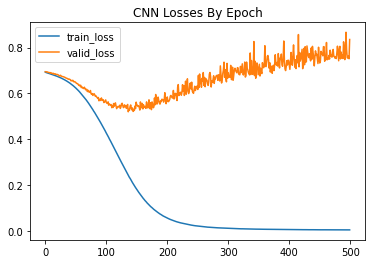

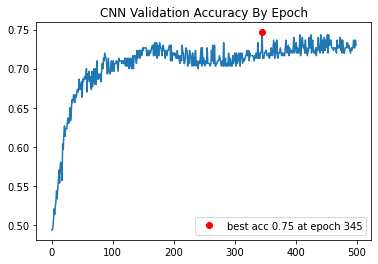

In [41]:
# all
model, train_loss, valid_loss, accuracy = eval_cnn(train_all, valid_all, vocab_size, opt=optim.Adadelta, lr=0.001, n_epoch=500)
trainLossPlot(train_loss, valid_loss)
accPlot(accuracy)
# test_accs(model, tests)

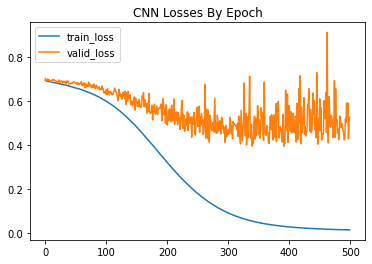

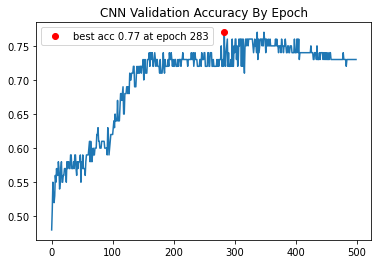

In [42]:
# amazon only
model_amaz, train_loss_amaz, valid_loss_amaz, accuracy_amaz = eval_cnn(train_amaz, valid_amaz, vocab_size_amaz, opt=optim.Adadelta, lr=0.001, n_epoch=500)
trainLossPlot(train_loss_amaz, valid_loss_amaz)
accPlot(accuracy_amaz)
# test_accs(model_amaz, tests)

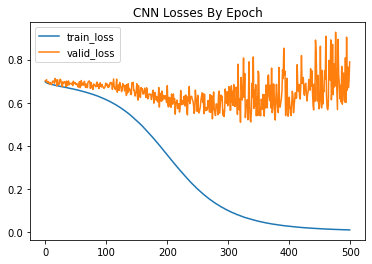

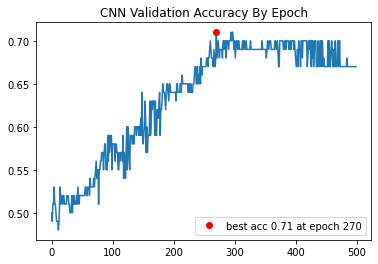

In [43]:
# imdb only
model_imdb, train_loss_imdb, valid_loss_imdb, accuracy_imdb = eval_cnn(train_imdb, valid_imdb, vocab_size_imdb, opt=optim.Adadelta, lr=0.001, n_epoch=500)
trainLossPlot(train_loss_imdb, valid_loss_imdb)
accPlot(accuracy_imdb)
# test_accs(model_imdb, tests)

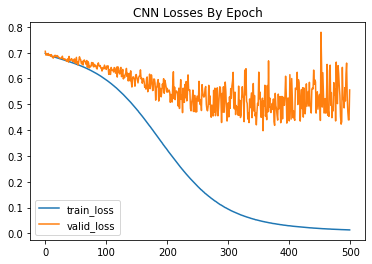

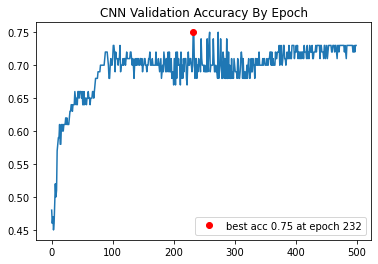

In [44]:
# yelp only
model_yelp, train_loss_yelp, valid_loss_yelp, accuracy_yelp = eval_cnn(train_yelp, valid_yelp, vocab_size_yelp, opt=optim.Adadelta, lr=0.001, n_epoch=500)
trainLossPlot(train_loss_yelp, valid_loss_yelp)
accPlot(accuracy_yelp)
# test_accs(model_yelp, tests)

### Architecture Improvement

In [45]:
class simpleCNN(nn.Module):
  def __init__(self, vocab_size, window_size=(1,2,3,5,7,11,13,17,19)):
    super(simpleCNN, self).__init__()
    self.n_embed = 500
    self.n_filters = 10
    self.hidden1 = 100
    # self.hidden2 = 50
    self.embed = nn.Embedding(vocab_size, self.n_embed)
    self.convs = nn.ModuleList([nn.Conv2d(1,self.n_filters,[window,self.n_embed]) for window in window_size])
    self.fc1 = nn.Linear(self.n_filters * len(window_size), self.hidden1)
    # self.fc2 = nn.Linear(self.hidden1, self.hidden2)
    self.output = nn.Linear(self.hidden1, 1)
    self.relu = nn.ReLU()
    self.tanh = torch.tanh
    self.leaky = nn.LeakyReLU(0.2)
      
  def forward(self, x):
    embeddings = self.embed(x)
    
    x = torch.unsqueeze(embeddings, 1)
    xs = []
    for conv in self.convs:
      x2 = self.leaky(conv(x))
      x2 = torch.squeeze(x2, -1)
      x2 = F.max_pool1d(x2, x2.size(2))
      xs.append(x2)
    x = torch.cat(xs, 2)

    x = x.view(x.size(0), -1)
    x = self.fc1(x)
    # x = self.fc2(x)
    x = self.output(x)

    x = torch.sigmoid(x)

    return x

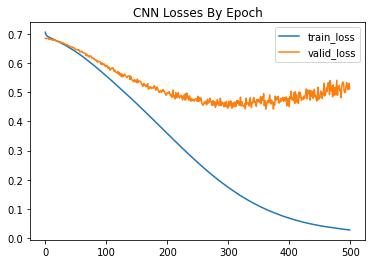

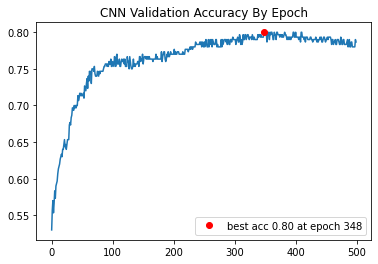

In [46]:
# all
model, train_loss, valid_loss, accuracy = eval_cnn(train_all, valid_all, vocab_size, cnn=simpleCNN, opt=optim.Adadelta, lr=0.001, n_epoch=500)
trainLossPlot(train_loss, valid_loss)
accPlot(accuracy)
# test_accs(model, tests)

# Analysis



## LIWC

In [48]:
'''
Created on Apr 5, 2013

@author: luamct
Provided by Zach Wood-Doughty
'''
import os
import numpy as np


class LIWC():

	def __init__(self):
		
		self.dimensions = {}
		self.names = []
		
		# Words and their associated dimensions
		self.entries = []
		
		# Cache for entries already found or entries with no * at the end (which can 
		# be retrieve in a O(1) hash operation)
		self.cache = {}

		# liwc_path = os.path.dirname(__file__) + "/liwc2007.dic"
		# if not os.path.exists(liwc_path):
		# 	raise FileNotFoundError("Could not find LIWC dictionary path: {}".format(liwc_path))
    # liwc_path = "/content/liwc2007.dic"
		_file = open("/content/liwc2007.dic",'r') # HARDCODE

		# First read dimensions
		for line in _file:
			if line.strip()=='%' : break
			
			# Get the index, ignore the name
			dim_id, dim_name = line.split()

			self.dimensions[dim_id] = len(self.dimensions)
			self.names.append(dim_name)

		# Now read word dictionary
		for line in _file:
			word_and_dims = line.split()
			word = word_and_dims[0]
			dims = word_and_dims[1:]
			
			if (word[-1] != '*') :
				self.cache[word] = dims
			else :
				self.entries.append( (word, dims) ) 

		_file.close()


	def matches(self, word, entry) :
		return word.startswith(entry[:-1])


	def add(self, count, dimensions) :
		
		# Get the dimension index and increment
		for dim_id in dimensions:
			dim_index = self.dimensions[dim_id]
			count[dim_index] += 1


	# Have to iterate through every word because there are also regular expressions,
	# otherwise we could have used a set or hashset structure for efficiency
	def search(self, word):
		for entry, dimensions in self.entries :
			if self.matches(word, entry) :
				return dimensions

		return None


	def binary(self, word):
		return self._binary_(word, 0, len(self.entries))


	def _binary_(self, word, s, e) :
		if s >= e : return None

		m  = int((s+e)/2)
		if m < len(self.entries):
			mword = self.entries[m][0][:-1] # Remove * at the end
			# Matched
			if word.startswith(mword) : return self.entries[m][1]
			
			# Search in the right partition
			if word < mword : return self._binary_(word, s, m)
			if word > mword :	return self._binary_(word, m+1, e)
		return None

	

	def classify(self, words):
		
		# Counts the occurrence of each dimension in the input words
		# Use 2 extra positions for the total of words considered and the
		# total of words successfully matched in the LIWC dictionary
		count = np.zeros(len(self.dimensions), dtype=int)
		tokens_matched=0
		for word in words:
			# If not in cache, look for it and add it if found
			if word not in self.cache :
				dimensions = self.binary(word)
				if dimensions != None :
					self.cache[word] = dimensions

			# If still not in cache then it's not in the LIWC dictionary
			if word in self.cache :
				self.add(count, self.cache[word])
				tokens_matched += 1

		return (len(words), tokens_matched, count)


	def readable(self, dim_count) :
		count = {}
		for i in range(len(dim_count)) :
			if dim_count[i] != 0 :
				count[self.names[i]] = dim_count[i]
		return count


In [49]:
def liwc_calc(text):
  L = LIWC()
  length, matched, labels = L.classify(text.split())
  return(L.readable(labels))

In [50]:
def aggregate(data):
  res = ''
  for i in range(len(data)):
    res += data[i]
    res += ' '
  return res

In [51]:
amazon_all = aggregate(X['amazon'])
imdb_all = aggregate(X['imdb'])
yelp_all = aggregate(X['yelp'])
all_aggregate = aggregate(X['all'])

print(liwc_calc(amazon_all))
print(liwc_calc(imdb_all))
print(liwc_calc(yelp_all))
print(liwc_calc(all_aggregate))

example = liwc_calc(aggregate(X['imdb'][5]))
print(liwc_calc(aggregate(X['imdb'][5])))
print(X['imdb'][5])
print(example['funct'])



{'funct': 4510, 'pronoun': 790, 'ppron': 279, 'i': 163, 'we': 2, 'you': 85, 'shehe': 5, 'they': 24, 'ipron': 511, 'article': 640, 'verb': 1190, 'auxverb': 808, 'past': 320, 'present': 745, 'future': 63, 'adverb': 420, 'preps': 999, 'conj': 554, 'negate': 198, 'quant': 283, 'number': 72, 'swear': 3, 'social': 487, 'family': 10, 'friend': 4, 'humans': 13, 'affect': 588, 'posemo': 411, 'negemo': 177, 'anx': 19, 'anger': 19, 'sad': 55, 'cogmech': 1402, 'insight': 99, 'cause': 194, 'discrep': 148, 'tentat': 158, 'certain': 119, 'inhib': 53, 'incl': 473, 'excl': 230, 'percept': 275, 'see': 73, 'hear': 134, 'feel': 56, 'bio': 95, 'body': 47, 'health': 20, 'sexual': 21, 'ingest': 7, 'relativ': 917, 'motion': 121, 'space': 406, 'time': 365, 'work': 234, 'achieve': 267, 'leisure': 49, 'home': 12, 'money': 174, 'relig': 3, 'death': 4, 'assent': 10, 'nonfl': 18}
{'funct': 6549, 'pronoun': 1064, 'ppron': 326, 'i': 64, 'we': 22, 'you': 91, 'shehe': 97, 'they': 52, 'ipron': 738, 'article': 1113, 'ver

In [52]:
#Run Liwc on the imdb dataset with every other word deleted and the svm results
imdb_deleted = []
for i in range(len(X_clean['imdb'])):
  reviews = X_clean['imdb'][i].split()
  del reviews[2 - 1::2]
  imdb_deleted.append(' '.join(reviews))

X_deleted_train, X_deleted_test, y_deleted_train, y_deleted_test = train_test_split(imdb_deleted, y['imdb'], test_size=0.2, random_state=rand_state)
X_deleted_valid, X_deleted_test, y_deleted_valid, y_deleted_test = train_test_split(X_test_imdb, y_test_imdb, test_size=0.5, stratify=y_test_imdb, random_state=rand_state)
x_train_deleted, x_valid_deleted, x_test_deleted = tfidf(X_deleted_train, X_deleted_valid, X_deleted_test)
score = svm_helper(clf, x_train_deleted, x_test_deleted, y_deleted_train, y_deleted_test)
print ("IMDB every other word is deleted score", score)

print()

x_train_imdb, x_valid_imdb, x_test_imdb = tfidf(X_train_imdb, X_valid_imdb, X_test_imdb)
score = svm_helper(clf, x_train_imdb, x_test_imdb, y_train_imdb, y_test_imdb)
print ("IMDB normal score", score)

print()

imdb_all = aggregate(X_clean['imdb'])
imdb_deleted_aggregate = aggregate(imdb_deleted)

print(liwc_calc(imdb_deleted_aggregate))
print(liwc_calc(imdb_all))


TP = 20 FP = 4 FN = 5 TN = 21
Precision = 0.8333333333333334 Recall = 0.8 Specificity = 0.84 False Positive = 0.16
IMDB every other word is deleted score 0.82

TP = 42 FP = 15 FN = 8 TN = 35
Precision = 0.7368421052631579 Recall = 0.84 Specificity = 0.7 False Positive = 0.3
IMDB normal score 0.77

{'funct': 554, 'pronoun': 60, 'ppron': 3, 'i': 1, 'we': 1, 'shehe': 1, 'ipron': 57, 'verb': 350, 'auxverb': 46, 'past': 135, 'present': 179, 'future': 18, 'adverb': 203, 'preps': 27, 'conj': 34, 'negate': 28, 'quant': 137, 'number': 76, 'swear': 12, 'social': 212, 'family': 15, 'friend': 3, 'humans': 40, 'affect': 651, 'posemo': 395, 'negemo': 254, 'anx': 37, 'anger': 67, 'sad': 40, 'cogmech': 623, 'insight': 131, 'cause': 74, 'discrep': 56, 'tentat': 115, 'certain': 147, 'inhib': 24, 'incl': 19, 'excl': 43, 'percept': 201, 'see': 126, 'hear': 34, 'feel': 34, 'bio': 77, 'body': 32, 'health': 25, 'sexual': 20, 'ingest': 4, 'relativ': 441, 'motion': 91, 'space': 114, 'time': 219, 'work': 102, '

## Normalizing LIWC Results

In [53]:
# Normalizing LIWC results

def normalize_liwc(liwc_dict):
  max_key = max(liwc_dict, key=liwc_dict.get)
  max_val = liwc_dict[max_key]
  for key, value in liwc_dict.items():
    liwc_dict[key] /= max_val
  return liwc_dict
  
liwc_amazon = liwc_calc(amazon_all)
liwc_imdb = liwc_calc(imdb_all)
liwc_yelp = liwc_calc(yelp_all)
liwc_all = liwc_calc(all_aggregate)

print(liwc_amazon)
print(normalize_liwc(liwc_amazon))


{'funct': 4510, 'pronoun': 790, 'ppron': 279, 'i': 163, 'we': 2, 'you': 85, 'shehe': 5, 'they': 24, 'ipron': 511, 'article': 640, 'verb': 1190, 'auxverb': 808, 'past': 320, 'present': 745, 'future': 63, 'adverb': 420, 'preps': 999, 'conj': 554, 'negate': 198, 'quant': 283, 'number': 72, 'swear': 3, 'social': 487, 'family': 10, 'friend': 4, 'humans': 13, 'affect': 588, 'posemo': 411, 'negemo': 177, 'anx': 19, 'anger': 19, 'sad': 55, 'cogmech': 1402, 'insight': 99, 'cause': 194, 'discrep': 148, 'tentat': 158, 'certain': 119, 'inhib': 53, 'incl': 473, 'excl': 230, 'percept': 275, 'see': 73, 'hear': 134, 'feel': 56, 'bio': 95, 'body': 47, 'health': 20, 'sexual': 21, 'ingest': 7, 'relativ': 917, 'motion': 121, 'space': 406, 'time': 365, 'work': 234, 'achieve': 267, 'leisure': 49, 'home': 12, 'money': 174, 'relig': 3, 'death': 4, 'assent': 10, 'nonfl': 18}
{'funct': 1.0, 'pronoun': 0.17516629711751663, 'ppron': 0.06186252771618625, 'i': 0.03614190687361419, 'we': 0.0004434589800443459, 'you'

In [54]:
# Running LIWC on pre-processed data
amazon_all_clean = aggregate(X_clean['amazon'])
imdb_all_clean = aggregate(X_clean['imdb'])
yelp_all_clean = aggregate(X_clean['yelp'])
all_aggregate_clean = aggregate(X_clean['all'])

liwc_amazon_clean = liwc_calc(amazon_all_clean)
liwc_imdb_clean = liwc_calc(imdb_all_clean)
liwc_yelp_clean = liwc_calc(yelp_all_clean)
liwc_all_clean = liwc_calc(all_aggregate_clean)

<BarContainer object of 61 artists>

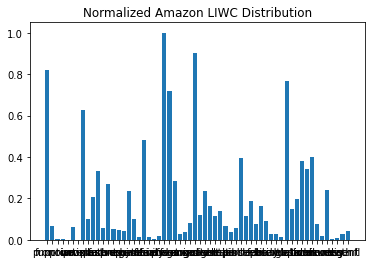

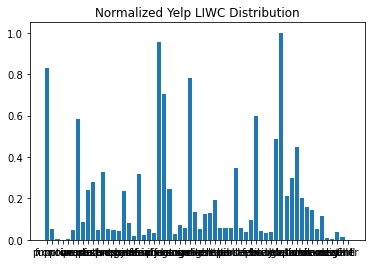

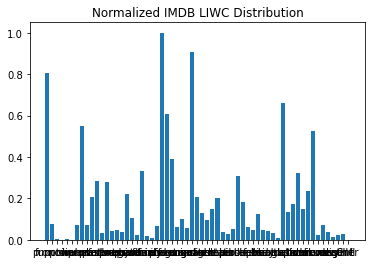

In [55]:
import matplotlib.pyplot as plt


plt.figure()
plt.title("Normalized Amazon LIWC Distribution")
plt.bar(normalize_liwc(liwc_amazon_clean).keys(), normalize_liwc(liwc_amazon_clean).values())

plt.figure()
plt.title("Normalized Yelp LIWC Distribution")
plt.bar(normalize_liwc(liwc_yelp_clean).keys(), normalize_liwc(liwc_yelp_clean).values())

plt.figure()
plt.title("Normalized IMDB LIWC Distribution")
plt.bar(normalize_liwc(liwc_imdb_clean).keys(), normalize_liwc(liwc_imdb_clean).values())


## Text Length


In [56]:
def avg_len(data):
  sum = 0
  for i in range(1000):
    sum += len(data[i])
  return sum/1000

In [57]:
print ("Amazon average sentence length", avg_len(X_clean['amazon']))
print ("Imdb average sentence length", avg_len(X_clean['imdb']))
print ("Yelp average sentence length", avg_len(X_clean['yelp']))
print ("All average sentence length", avg_len(X_clean['all']))

Amazon average sentence length 34.509
Imdb average sentence length 51.493
Yelp average sentence length 36.136
All average sentence length 34.509


## LIWC on correct and incorrect classifications

In [58]:
model = svm.SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

clf.fit(x_train_features, y_train)
preds = clf.predict(x_test_features)

In [59]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X['all'], y['all'], test_size=0.2, random_state=69)
X_valid_1, X_test_1, y_valid_1, y_test_1 = train_test_split(X_test_1, y_test_1, test_size=0.5, stratify = y_test_1, random_state=69)

print(X_train_1[10])
print(X_train[10])

I waited and waited.
waited waited


In [60]:
misclassified = []
correct = []

for row_index, (input, prediction, label) in enumerate(zip (X_test, preds, y_test)):
  if prediction != label:
    misclassified.append(X_test_1[row_index])
  else:
    correct.append(X_test_1[row_index])

print(len(misclassified))
print(len(correct))
print(liwc_calc(aggregate(misclassified)))
print(liwc_calc(aggregate(correct)))

51
249
{'funct': 328, 'pronoun': 55, 'ppron': 24, 'i': 9, 'we': 7, 'you': 7, 'shehe': 1, 'ipron': 31, 'article': 40, 'verb': 92, 'auxverb': 65, 'past': 28, 'present': 52, 'future': 5, 'adverb': 31, 'preps': 67, 'conj': 46, 'negate': 16, 'quant': 18, 'number': 8, 'social': 36, 'family': 2, 'friend': 1, 'humans': 1, 'affect': 25, 'posemo': 19, 'negemo': 6, 'anger': 1, 'sad': 2, 'cogmech': 112, 'insight': 9, 'cause': 13, 'discrep': 10, 'tentat': 9, 'certain': 13, 'inhib': 2, 'incl': 41, 'excl': 21, 'percept': 27, 'see': 5, 'hear': 13, 'feel': 5, 'bio': 11, 'body': 7, 'health': 1, 'ingest': 3, 'relativ': 58, 'motion': 3, 'space': 32, 'time': 22, 'work': 7, 'achieve': 8, 'leisure': 16, 'home': 1, 'money': 6, 'relig': 2, 'assent': 1}
{'funct': 1340, 'pronoun': 232, 'ppron': 86, 'i': 33, 'we': 11, 'you': 16, 'shehe': 12, 'they': 14, 'ipron': 146, 'article': 191, 'verb': 375, 'auxverb': 267, 'past': 131, 'present': 197, 'future': 17, 'adverb': 135, 'preps': 286, 'conj': 170, 'negate': 50, 'qua